In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.datasets import fetch_20newsgroups
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.model_selection import GridSearchCV
import numpy as np
import matrix_dev
import matplotlib.pyplot as plt
import _pickle
import gensim
import gensim.corpora as corpora
import os
from pprint import pprint
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
import spacy
import pandas as pd
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
from lda_implementation import lda_model

In [3]:
lda = lda_model()

/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:88: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr))[0]
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dtype=np.dtype(descr)).reshape(obj[b'shape'])
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/msgpack_numpy.py:84: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  dt

In [4]:
lda.load_data('raw_docs', 'dev')

loading pickles


/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/gensim/models/phrases.py:494: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [5]:
#lda.lda_mallet_model()
best_model, coherence_values = lda.best_model_search()


Num_topics =  5  corresponding coherence value:  0.4454531933213654
Num_topics =  25  corresponding coherence value:  0.5750067785373497
Num_topics =  45  corresponding coherence value:  0.6007898788610748
Num_topics =  65  corresponding coherence value:  0.6136536110827444
Num_topics =  85  corresponding coherence value:  0.6211681021246913


In [6]:
model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(best_model)
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, lda.corpus, lda.id2word)

In [7]:
vis

PreparedData(topic_coordinates=           Freq  cluster  topics         x         y
topic                                               
12     1.383015        1       1 -0.000130 -0.000058
68     1.323380        1       2  0.000068 -0.000098
35     1.305376        1       3  0.000019 -0.000311
66     1.209089        1       4  0.000271  0.000024
61     1.208919        1       5 -0.000260 -0.000020
52     1.207824        1       6 -0.000038  0.000197
9      1.204437        1       7  0.000260  0.000149
81     1.200284        1       8 -0.000183  0.000040
69     1.198058        1       9 -0.000177 -0.000053
26     1.197337        1      10 -0.000271  0.000038
75     1.194490        1      11 -0.000209 -0.000033
39     1.190220        1      12  0.000034 -0.000290
36     1.189129        1      13  0.000061 -0.000311
14     1.188723        1      14  0.000441  0.000211
44     1.187709        1      15 -0.000501 -0.000274
30     1.184693        1      16  0.000340  0.000107
20     1.183169        1      17  0.000011  0.000603
42     1.182027        1      18  0.000121  0.000299
76     1.181948        1      19 -0.000056 -0.000103
4      1.180877        1      20 -0.000277  0.000178
65     1.179867        1      21 -0.000468 -0.000248
15     1.179831        1      22 -0.000106  0.000026
37     1.179602        1      23  0.000371 -0.000198
46     1.179538        1      24 -0.000149  0.000102
79     1.178057        1      25 -0.000073 -0.000112
6      1.176748        1      26  0.000185  0.000044
28     1.176179        1      27  0.000037  0.000262
34     1.176091        1      28  0.000141  0.000012
80     1.175799        1      29  0.000363 -0.000124
25     1.175605        1      30 -0.000013  0.000284
...         ...      ...     ...       ...       ...
57     1.163273        1      56 -0.000087  0.000039
49     1.162763        1      57 -0.000356  0.000375
5      1.161706        1      58  0.000013 -0.000060
43     1.161587        1      59  0.000090  0.000129
54     1.161130        1      60 -0.000160 -0.000338
33     1.161119        1      61 -0.000023  0.000238
24     1.160659        1      62  0.000171 -0.000265
73     1.160199        1      63  0.000086 -0.000486
32     1.159730        1      64 -0.000200 -0.000205
29     1.159651        1      65  0.000315 -0.000037
74     1.159200        1      66  0.000127 -0.000164
38     1.158817        1      67 -0.000091  0.000280
72     1.158361        1      68 -0.000087  0.000119
60     1.158099        1      69 -0.000138  0.000199
51     1.157904        1      70 -0.000363 -0.000044
59     1.157877        1      71 -0.000010 -0.000212
83     1.156519        1      72 -0.000035  0.000280
41     1.155458        1      73  0.000206  0.000259
82     1.155194        1      74  0.000498  0.000444
10     1.154007        1      75 -0.000356  0.000281
55     1.153360        1      76 -0.000012 -0.000172
67     1.153259        1      77  0.000065 -0.000145
1      1.153178        1      78 -0.000122 -0.000358
70     1.152135        1      79  0.000117 -0.000091
17     1.151613        1      80  0.000361 -0.000113
16     1.151189        1      81 -0.000072 -0.000152
0      1.148624        1      82  0.000075  0.000036
50     1.144025        1      83  0.000045  0.000089
11     1.143560        1      84 -0.000198  0.000119
53     1.143221        1      85 -0.000117  0.000078

[85 rows x 5 columns], topic_info=      Category      Freq            Term     Total  loglift  logprob
term                                                                
12723  Default  3.000000         majesty  3.000000  30.0000  30.0000
1552   Default  3.000000       challenge  3.000000  29.0000  29.0000
16163  Default  3.000000            ipin  3.000000  28.0000  28.0000
17994  Default  3.000000         sniffle  3.000000  27.0000  27.0000
18219  Default  3.000000          mensen  3.000000  26.0000  26.0000
17743  Default  3.000000           greek  3.000000  25.0000  25.0000
3235   Default  3.000000        emberass  3

In [22]:
best_model.load_word_topics()

[array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 1., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([2., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([1., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 1.]),
 array([0., 0., 0., ..., 1., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 1., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([0., 0., 0., ..., 

In [23]:
name = 'word_topics'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "wb") as f:
	_pickle.dump(best_model.load_word_topics(), f)

/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/_pytest/fixtures.py:844: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  params = attr.ib(convert=attr.converters.optional(tuple))
/Users/nantanick/anaconda/envs/nlu/lib/python3.6/site-packages/_pytest/fixtures.py:846: DeprecationWarning: The `convert` argument is deprecated in favor of `converter`.  It will be removed after 2019/01.
  ids = attr.ib(default=None, convert=_ensure_immutable_ids)


ValueError: x and y must have same first dimension, but have shapes (10,) and (5,)

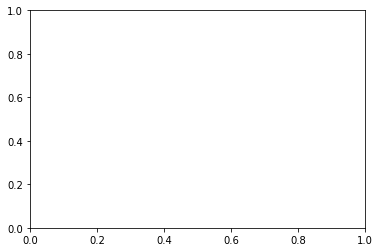

In [8]:
start=30
limit=500
step=50
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
name = 'best_model'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "wb") as f:
	_pickle.dump(best_model, f)

In [ ]:

name = 'best_model'
path = os.path.join('../../feature_groups/lda_pickles', name)
with open(path, "rb") as f:
	best_model = _pickle.load(f)

Dominant topic per tweet(tweet)

In [9]:
dominant_topic = lda.domininant_topic(best_model)
dominant_topic

,Dominant_Topic,Perc_Contribution,Topic_Keywords,0
0,61.0,0.0661,"egypt, amp, libya, mubarak, hard, republican, ...",tunisia egypt bahrain libya courage is conta...
1,70.0,0.0511,"earthquake, godfinger, money, power, hit_level...",i just earned the 'rumble in the jungle' award...
2,15.0,0.0263,"game, sad, lot, ipod, today, addict, head, tsu...",about to head to the airport soon \n
3,3.0,0.0439,"enter, die, win, hour, check, tweet, laptop, f...",enter to win a bar of handmade 100% vegan soap...
4,31.0,0.0274,"twitter, people, reform, learn, madison, talk,...",i know i'm late and all i'm just getting back ...
5,31.0,0.0502,"twitter, people, reform, learn, madison, talk,...",starting on wednesday 915 is hosting a twitter...
6,7.0,0.0195,"harrypotter, school, fall, wikileak, arrest, p...",at this crazy time i'm at school already x\n
7,31.0,0.0476,"twitter, people, reform, learn, madison, talk,...",question if sum1 u use to talk to says they ...
8,68.0,0.0615,"aku, ada, mau, aja, sama, bisa, banget, nih, j...",news carrefour menggeser pasar tradisionil col...
9,8.0,0.0284,"bring, pra, trend, information, bad, birthday,...",thankful for everything because without it i d...


In [17]:
dominant_topic.to_csv('../../feature_groups/lda_distributions/dominant_topic.csv')

Find the most representative document each topic

In [10]:
representative_doc = lda.get_representative_docs(best_model)
representative_doc

,Topic_Num,Topic_Perc_Contrib,Keywords,Text
0,0.0,0.0619,"android, phone, put, site, south, queria, week...",i just installed twidroyd for twitter on my an...
1,1.0,0.0619,"world, day, death, high, wikileak, assange, co...",bizarro world dems believe less competition be...
2,2.0,0.1047,"android, app, iphone, cool, phone, market, ver...",is now compiling flash apps that run on androi...
3,3.0,0.1267,"enter, die, win, hour, check, tweet, laptop, f...",we're giving away an hp laptop $629 retail va...
4,4.0,0.2719,"a¾a, aµa, wikileak, a³a, aµa_a½a, a¾a_a½a, a¾,...",lovelt=gt rt Ã¯Â½Â»Ã¯Â¾ÂÃ¯Â½Â¼Ã¯Â½Â¢Ã£ÂÂ¯...
5,5.0,0.0995,"kill, hear, wait, dontjudgeme, site, egyptian,...",lovelt=gt heard u love gummy bears *waits for ...
6,6.0,0.0923,"video, tsunami, add, country, click, dec, andr...",saya tidak mau menjadi generasi penerus bangsa...
7,7.0,0.0925,"harrypotter, school, fall, wikileak, arrest, p...",mosquitos estÃ£Â£o me comendo viva tem que ver...
8,8.0,0.0778,"bring, pra, trend, information, bad, birthday,...",infografik som fÃ£Â¶rvirrar twitter is not cen...
9,9.0,0.0977,"wine, glass, food, kid, party, parent, ela, te...",wine food wine of the week vale du bomfin dour...


In [16]:
representative_doc.to_csv('../../feature_groups/lda_distributions/representative_doc.csv')

 Topic distribution across documents

In [11]:
topic_dist_doc =  lda.topic_distribution(best_model)
topic_dist_doc

topic distribution


,Dominant_Topic,Topic_Keywords,Num_Documents,Perc_Documents
0,61.0,"egypt, amp, libya, mubarak, hard, republican, ...",313.0,0.0313
1,70.0,"earthquake, godfinger, money, power, hit_level...",107.0,0.0107
2,15.0,"game, sad, lot, ipod, today, addict, head, tsu...",194.0,0.0194
3,3.0,"enter, die, win, hour, check, tweet, laptop, f...",137.0,0.0137
4,31.0,"twitter, people, reform, learn, madison, talk,...",76.0,0.0076
5,31.0,"twitter, people, reform, learn, madison, talk,...",112.0,0.0112
6,7.0,"harrypotter, school, fall, wikileak, arrest, p...",145.0,0.0145
7,31.0,"twitter, people, reform, learn, madison, talk,...",160.0,0.0160
8,68.0,"aku, ada, mau, aja, sama, bisa, banget, nih, j...",114.0,0.0114
9,8.0,"bring, pra, trend, information, bad, birthday,...",171.0,0.0171


In [15]:
topic_dist_doc.to_csv('../../feature_groups/lda_distributions/topic_dist_doc.csv')

show_topics

In [24]:
model_topics = best_model.show_topics(formatted=False)
pprint(best_model.print_topics(num_topics=480, num_words=10))

[(0,
  '0.041*"android" + 0.039*"phone" + 0.036*"put" + 0.034*"site" + '
  '0.022*"south" + 0.015*"queria" + 0.014*"week" + 0.014*"happen" + '
  '0.013*"play" + 0.013*"gift_card"'),
 (1,
  '0.049*"world" + 0.042*"day" + 0.030*"death" + 0.029*"high" + '
  '0.027*"wikileak" + 0.024*"assange" + 0.022*"cost" + 0.020*"tcot_tlot" + '
  '0.019*"late" + 0.017*"trip"'),
 (2,
  '0.258*"android" + 0.071*"app" + 0.050*"iphone" + 0.034*"cool" + '
  '0.033*"phone" + 0.027*"market" + 0.014*"verizon" + 0.014*"party" + '
  '0.010*"egyptian" + 0.010*"star"'),
 (3,
  '0.073*"enter" + 0.060*"die" + 0.046*"win" + 0.045*"hour" + 0.038*"check" + '
  '0.030*"tweet" + 0.029*"laptop" + 0.018*"fb" + 0.016*"pick" + 0.016*"prize"'),
 (4,
  '0.077*"a¾a" + 0.074*"aµa" + 0.068*"wikileak" + 0.053*"a³a" + '
  '0.029*"aµa_a½a" + 0.026*"a¾a_a½a" + 0.019*"a¾" + 0.019*"a½a_a¾a" + '
  '0.015*"a½" + 0.014*"niet"'),
 (5,
  '0.053*"kill" + 0.048*"hear" + 0.043*"wait" + 0.031*"dontjudgeme" + '
  '0.028*"site" + 0.027*"egyptian"